# Análise do Titanic

Quero que você faça uma análise da tragédia do Titanic, verifique quais são as características mais importantes para a morte de um indivíduo nessa tragédia. Para isso, você vai utilizar os dados que estão no arquivo **titanic.csv** na pasta **dados**. Esses dados foram retirados da plataforma Kaggle, para maiores informações sobre as colunas e seus valores acessar [aqui](https://www.kaggle.com/c/titanic/data).

### Importando os pacotes para análise

In [2]:
# para manipulação dos dados
import pandas as pd
# para visualização
from plotnine import *
import matplotlib.pyplot as plt

# para que os gráficos sejam
# mostrados
%matplotlib inline

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Carregando o conjunto de dados

Carregue o conjunto de dados, que se encontra em *"../dados/titanic.csv"*, com auxílio do método ```pd.read_csv```

In [3]:
# Para mais informações sobre
# o funcionamento do método
# execute o seguinte comando:
# ?pd.read_csv

# Faça o carregamento aqui.
# df = pd.read_csv(...)

file_path = "../dados/titanic.csv"

titanic = pd.read_csv(file_path)

### Tendo uma visão geral do conjunto de dados

Imprima as 10 primeira linhas do dataframe com o método ```df.head``` e, em seguita, imprima as estatísticas gerais do conjunto de dados com o método ```df.describe```.

In [4]:
# use o head aqui...
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
# use o método describe aqui...
# lembre-se de utilizar o argumento
# `include="all"`, para obter as
# estatísticas das colunas categóricas e numéricas.

titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Strandberg, Miss. Ida Sofia",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Primeiro gráfico

No gráfico a seguir, queríamos construir um boxplot para cada classe, porém a coluna Pclass é foi inferida como numérica.

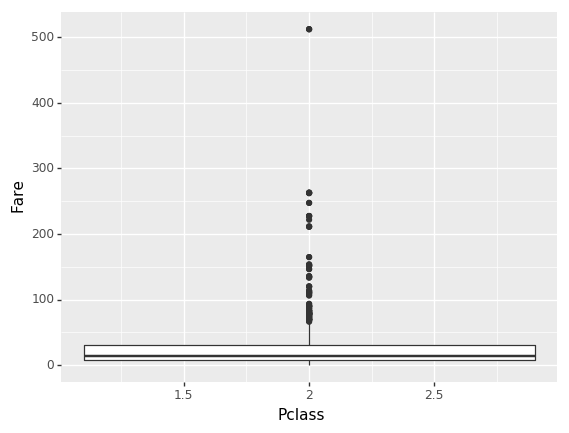

<ggplot: (-9223371985931910186)>

In [5]:
ggplot(titanic, aes(x = "Pclass", y = "Fare")) + \
geom_boxplot()

O plotnine nos provê uma forma muito simples de contornar esse problema, utilizando a expressão **factor** juntamente com nome da coluna que queremos que seja tratada como categórica. Veja o exemplo abaixo.

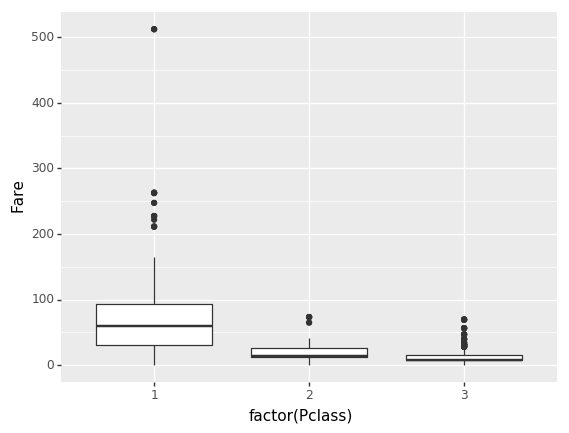

<ggplot: (50923496775)>

In [6]:
ggplot(titanic, aes(x = "factor(Pclass)", y = "Fare")) + \
geom_boxplot()

Além dessa alternativa, nós podemos de fato transformar as colunas em categóricas como vai ser mostrado a seguir.

### Transformando colunas Survived e Pclass em categóricas

Note que os tipos das colunas Survived e Pclass foram armazenadas com valores numéricos e , portanto, o pandas inferiu que elas fossem numéricas no dataframe. Porém, elas tem mais uma conotação de categoria, pois estamos classificando algo com elas. Portanto, vamos tratá-las como colunas categóricas. Para isso, precisamos apenas converter para o tipo do pandas chamado "category".

In [7]:
# Estou transformando os rótulos `zero` e `um` em algo mais legível com a função apply
# e, então, convertendo a series para o tipo categórico com a função astype
titanic['cat_Survived'] = titanic.Survived.apply(lambda x: ["morreu", "sobreviveu"][x]).astype("category")

# veja o resultado a seguir
titanic['cat_Survived'].head()

0        morreu
1    sobreviveu
2    sobreviveu
3    sobreviveu
4        morreu
Name: cat_Survived, dtype: category
Categories (2, object): [morreu, sobreviveu]

In [8]:
# Faça o mesmo com a coluna Pclass
# df['cat_Pclass'] = ...

titanic['cat_Pclass'] = titanic.Pclass.apply(lambda x: ["", "Primeira","Segunda", "Terceira"][x]).astype("category")

# veja o resultado a seguir
titanic['cat_Pclass'].head()
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cat_Survived,cat_Pclass
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,morreu,Terceira
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,morreu,Terceira
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,morreu,Segunda
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,morreu,Terceira
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,morreu,Terceira
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,morreu,Segunda
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,sobreviveu,Primeira
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,morreu,Terceira
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,sobreviveu,Primeira
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,morreu,Terceira


### Execute o df.describe novamente

In [9]:
# use o método describe aqui...
# lembre-se de utilizar o argumento
# `include="all"`, para obter as
# estatísticas das colunas categóricas e numéricas.
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cat_Survived,cat_Pclass
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,2,3
top,NaN,NaN,NaN,"Strandberg, Miss. Ida Sofia",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S,morreu,Terceira
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,549,491
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN


### Visualizando  como valor dos tickets influenciam na sobrevivência

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


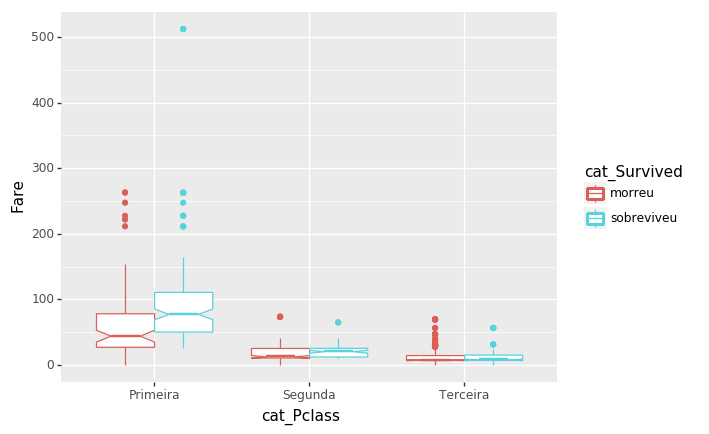

<ggplot: (50923697949)>

In [10]:
ggplot(titanic, aes(x = "cat_Pclass", y = "Fare", color="cat_Survived")) + \
geom_boxplot(notch=True)

É possível notar que para primeira classe há uma diferença entre a mediana dos grupos, ou seja, o preço do tickets tem uma certa influência na chance de sobreviência. Todavia, não é o único fator. Para as demais classes é difícil de ver essa diferença devido a escala do valor dos tickets em cada grupo. Em outras palavras, o preço do tickets da primeira classe é muito maior que o preço dos tickets da segunda e terceira.

Uma forma de contornar esse problema seria deixar os valores em uma mesma escala. Para isso, nós poderíamos dividir os valores em cada grupo por seus respectivos valores máximos.

Para isso, iremos utilizar o método ```groupby``` em conjunto com o ```apply```. O exemplo a seguir mostra como:

In [11]:
# agrupamos os valores dos tickets por classe e, então,
# cada um desses valores é divido pelo valor máximo da classe
titanic['scaledFare'] = titanic.groupby('cat_Pclass').Fare.apply(lambda class_fares: class_fares / class_fares.max())

titanic.groupby('cat_Pclass').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,scaledFare
cat_Pclass,,,,,,,,
Primeira,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.164259
Segunda,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.281118
Terceira,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.196629


C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


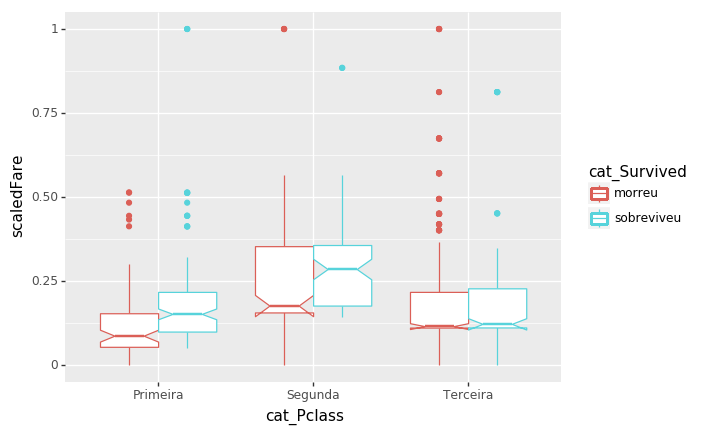

<ggplot: (50923742647)>

In [12]:
ggplot(titanic, aes(x = "cat_Pclass", y = "scaledFare", color="cat_Survived")) + \
geom_boxplot(notch=True)

### Visualizando  como idade e gênero afetam a sobrevivência

Trace um boxplot para tentar visualizar como idade e gênero afetam a sobrevivência.

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


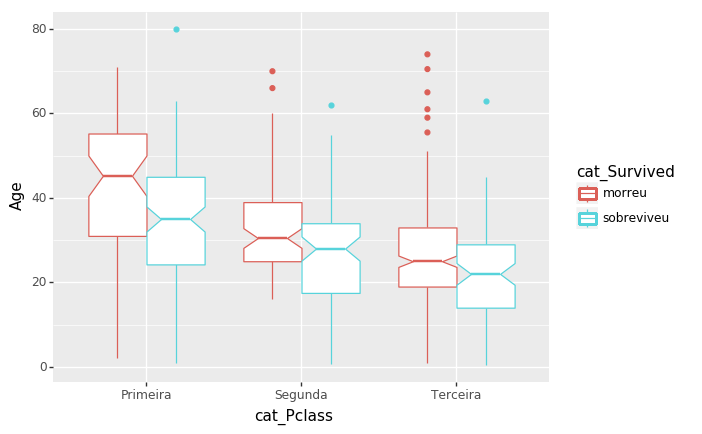

<ggplot: (-9223371985930993229)>

In [13]:
grafico = ggplot(titanic, aes(x = "cat_Pclass", y = "Age", color="cat_Survived")) 
grafico += geom_boxplot(notch=True) 
#grafico += geom_jitter()

grafico

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


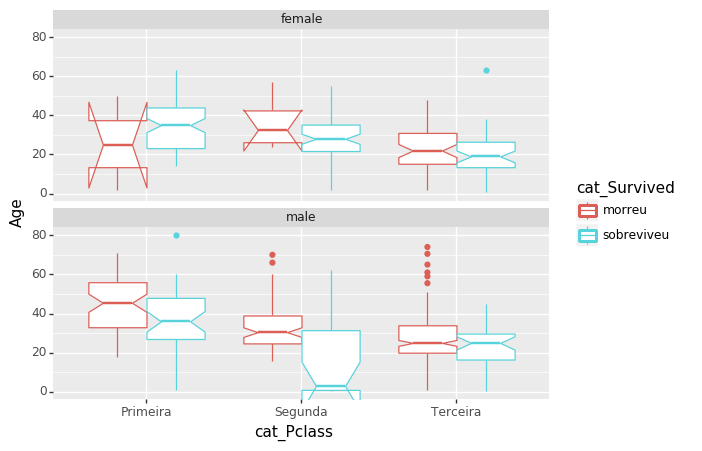

<ggplot: (-9223371985930993229)>

In [14]:
# Além do ggplot e boxplot, utilize facet_wrap para dividir o gráfico por gênero.
grafico += facet_wrap('~Sex', ncol = 1)
grafico

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."
C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_jitter : Removed 177 rows containing missing values.
  self.data = self.geom.ha

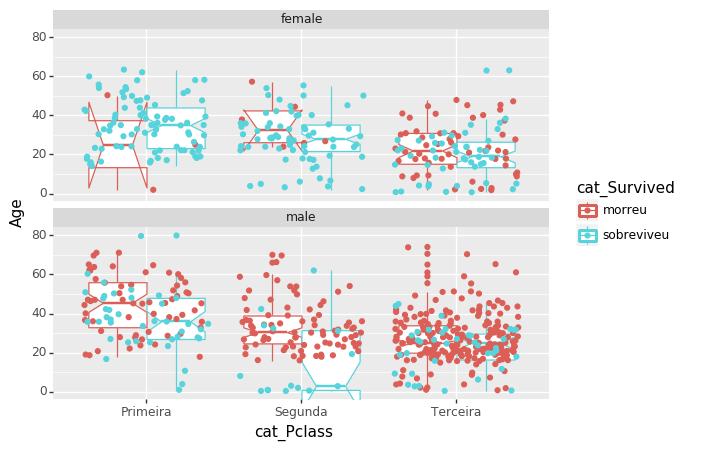

<ggplot: (-9223371985930993229)>

In [15]:
# For fim, adicione o geom_jitter. Ele é um bom complemento ao box_plot,
# pois conseguimos ter uma noção de quantidade de pontos no box_plot
grafico += geom_jitter()
grafico

### Discretizando a Idade

Em análise de dados, muitas vezes é interessante dividir colunas numéricas em intervalos de valores. Isso é discretizar um dado. Para a gente proceguir em nossa análise vamos discretizar a idade dos passageiros, nomeando os intervalos em crinca, adulto e idoso.

Vamos assumir os seguintes intervalos:
    
    1) crianças têm idades no intervalo [0, 15)
    2) adultos têm idades no intervalo [15, 45)
    3) adultos têm idades no intervalo [45, 100]
    
Crie uma nova coluna no dataframe chamada faixa_etaria e povoe-a com as faixas estárias dos passageiros de acordo com a regra acima.

In [16]:
# removendo idades nulas
titanic.dropna(subset=['Age'], inplace=True)

# criando a coluna faixa_etaria com valores nulos
titanic['faixa_etaria'] = None

# povoando as linhas dos adultos.
# linhas nas quais a idade está no intervalo [15, 45).
titanic.loc[(15 <= titanic.Age) & (titanic.Age < 45), 'faixa_etaria'] = 'adulto'

# povoe as linhas das crianças.
# linhas nas quais a idade está no intervalo [0, 15).
# descomente a linha abaixo e substitua ... pela expressão correta
# df.loc[..., 'faixa_etaria'] = 'crianca'
titanic.loc[(titanic.Age < 15), 'faixa_etaria'] = 'crianca'

# povoe as linhas dos idoso.
# linhas nas quais a idade está no intervalo [45, 100].
# descomente a linha abaixo e substitua ... pela expressão correta
# df.loc[..., 'faixa_etaria'] = 'idoso'
titanic.loc[(45 <= titanic.Age) & (titanic.Age < 100), 'faixa_etaria'] = 'idoso'

In [17]:
titanic.faixa_etaria.value_counts()

adulto     521
idoso      115
crianca     78
Name: faixa_etaria, dtype: int64

#### Funções cut e qcut

O pandas provê mecanismos de discretização automática através das funções [cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) e [qcut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html). Para mais informações sobre elas, dê uma olhada na documentação e no exemplo abaixo.

In [18]:
titanic['faixa_etaria_qcut'] = pd.qcut(titanic.Age, q=[0, .10, .85, 1.], labels=['crianca', 'adulto', 'idoso'])

In [19]:
titanic.faixa_etaria_qcut.value_counts()

adulto     534
idoso      103
crianca     77
Name: faixa_etaria_qcut, dtype: int64

### Calculando a proporção de passageiros mortos por classe

In [250]:
def taxa_de_mortalidade(survived_por_grupo):
    """Returna a taxa de mortalidade de um dados grupo
    :param survived_por_grupo: ndarray ou pd.Series.
        valores da coluna cat_Survived por grupo
    :return: float.
        Taxa de mortalidade do grupo
    """
    return (survived_por_grupo == 'morreu').sum() / survived_por_grupo.shape[0]
    
titanic.groupby(['cat_Pclass']).cat_Survived.aggregate(taxa_de_mortalidade)

cat_Pclass
Primeira    0.347826
Segunda     0.520231
Terceira    0.760563
Name: cat_Survived, dtype: float64

### Calcule a proporção de passageiros mortos por classe e gênero

Substitua os ... pelas colunas da classe e gênero dos passageiros.

In [243]:
# substitua ... pelas colunas da classe e gênero dos passageiros
titanic.groupby(['cat_Pclass','Sex']).cat_Survived.aggregate(taxa_de_mortalidade)

cat_Pclass  Sex   
Primeira    female    0.036145
            male      0.603960
Segunda     female    0.081081
            male      0.848485
Terceira    female    0.539216
            male      0.849802
Name: cat_Survived, dtype: float64

### Calcule a proporção de passageiros mortos por classe, gênero e faixa etária

Substitua os ... pelas colunas da classe, gênero e faixa etária dos passageiros. Por favor, utilizar a coluna **faixa_etaria_qcut** para faixa etária.

In [291]:
taxa = titanic.groupby(['cat_Pclass','Sex','faixa_etaria_qcut','cat_acompanhado']).\
            cat_Survived.aggregate(taxa_de_mortalidade).\
            reset_index(name='taxa_mortalidade')
taxa

,cat_Pclass,Sex,faixa_etaria_qcut,cat_acompanhado,taxa_mortalidade
0,Primeira,female,crianca,Acompanhado,0.500000
1,Primeira,female,adulto,Acompanhado,0.027027
2,Primeira,female,adulto,Sozinho,0.000000
3,Primeira,female,idoso,Acompanhado,0.000000
4,Primeira,female,idoso,Sozinho,0.200000
5,Primeira,male,crianca,Acompanhado,0.000000
6,Primeira,male,adulto,Acompanhado,0.592593
7,Primeira,male,adulto,Sozinho,0.482759
8,Primeira,male,idoso,Acompanhado,0.647059
9,Primeira,male,idoso,Sozinho,0.800000


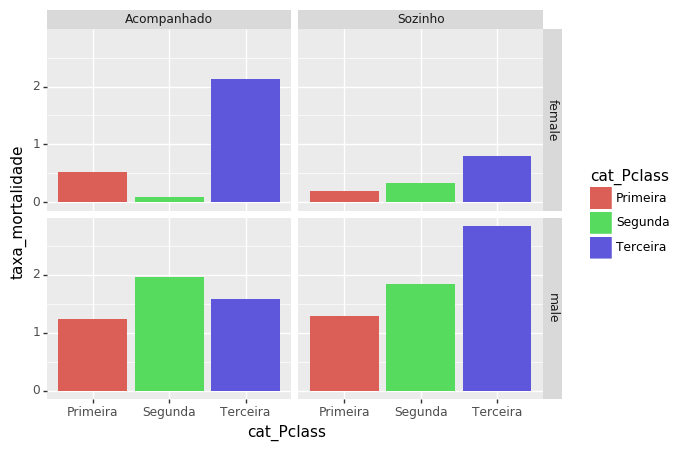

<ggplot: (50926224718)>

In [292]:
ggplot(taxa, aes(x='cat_Pclass', y='taxa_mortalidade', fill='cat_Pclass')) + \
geom_bar(stat='identity') + \
facet_grid('Sex~cat_acompanhado')

### Outras análises

Fique a vontade em fazer outros gráficos e utilizar outras colunas para análises.

In [90]:
# criando a coluna faixa_etaria com valores nulos
titanic['acompanhado_seg'] = None

titanic.loc[(titanic.SibSp > 0), 'acompanhado_seg'] = 'Acompanhado'

titanic.loc[(0 == titanic.SibSp), 'acompanhado_seg'] = 'Sozinho'

titanic.acompanhado_seg.value_counts()

Sozinho        471
Acompanhado    243
Name: acompanhado_seg, dtype: int64

In [249]:
titanic.acompanhado_pri.value_counts()

Sozinho        519
Acompanhado    193
Name: acompanhado_pri, dtype: int64

In [260]:
# criando a coluna faixa_etaria com valores nulos
titanic['acompanhado_pri'] = None

titanic.loc[(titanic.Parch > 0), 'acompanhado_pri'] = 'Acompanhado'

titanic.loc[(0 == titanic.Parch), 'acompanhado_pri'] = 'Sozinho'

titanic.acompanhado_pri.value_counts()

# substitua ... pelas colunas da classe e gênero dos passageiros
titanic.groupby(['Sex','acompanhado_pri']).cat_Survived.aggregate(taxa_de_mortalidade)

p1 = titanic.groupby(['cat_Pclass','Sex','acompanhado_pri','acompanhado_seg']).\
            cat_Survived.aggregate(taxa_de_mortalidade).\
            reset_index(name='taxa_mortalidade')

In [290]:
# criando a coluna faixa_etaria com valores nulos
titanic['cat_acompanhado'] = 'Acompanhado'

titanic.loc[(titanic.acompanhado_pri == 'Sozinho') & (titanic.acompanhado_seg == 'Sozinho'), 'cat_acompanhado'] = 'Sozinho'

titanic.cat_acompanhado.value_counts()


Sozinho        402
Acompanhado    310
Name: cat_acompanhado, dtype: int64

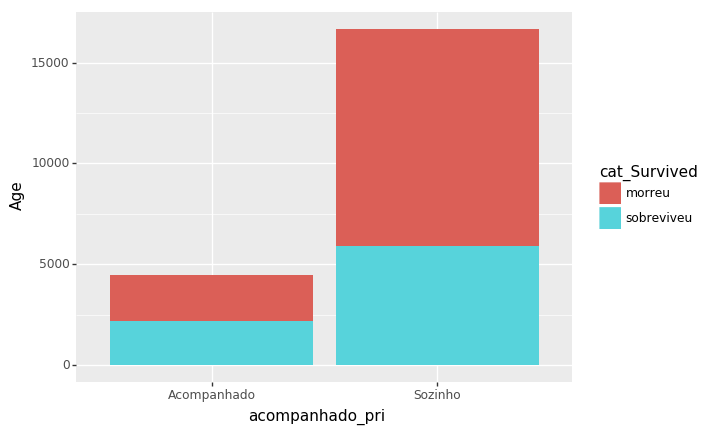

<ggplot: (-9223371985930515438)>

In [252]:
grafico = ggplot(titanic, aes(x = "acompanhado_pri", y = "Age", fill="cat_Survived")) 
grafico += geom_bar(stat='identity')
#grafico += geom_boxplot(notch=True) 
    #grafico += facet_wrap('~acompanhado_pri', ncol = 1)
#grafico += geom_jitter()
grafico

In [271]:
titanic.groupby('Sex').sum()
#pais / filhos a bordo do Titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,scaledFare
Sex,,,,,,,,
female,114000,195,537,7186.00,167,185,12259.1002,62.979704
male,205396,93,1058,13919.17,199,123,12352.7828,86.706983


In [119]:
titanic.groupby('acompanhado_seg').sum()
#irmãos / cônjuges a bordo do Titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,scaledFare
acompanhado_seg,,,,,,,,
Acompanhado,104134,115,519,6416.92,366,202,11510.5462,73.085938
Sozinho,215262,173,1076,14688.25,0,106,13101.3368,76.600749


In [41]:
titanic.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [97]:
# removendo idades nulas
titanic.dropna(subset=['Embarked'], inplace=True)

# criando a coluna faixa_etaria com valores nulos
titanic['embarque'] = None

titanic.loc[(titanic.Embarked == 'S'), 'embarque'] = 'Southampton'
titanic.loc[(titanic.Embarked == 'C'), 'embarque'] = 'Cherbourg'
titanic.loc[(titanic.Embarked == 'Q'), 'embarque'] = 'Queenstown'

titanic.embarque.value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: embarque, dtype: int64

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


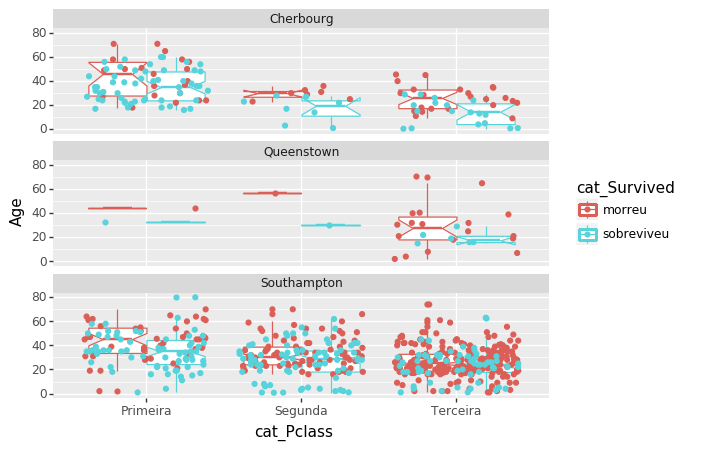

<ggplot: (-9223371985930540754)>

In [98]:
grafico = ggplot(titanic, aes(x = "cat_Pclass", y = "Age", color="cat_Survived")) 
grafico += geom_boxplot(notch=True) 
#grafico += geom_jitter()
# Além do ggplot e boxplot, utilize facet_wrap para dividir o gráfico por gênero.
grafico += facet_wrap('~embarque', ncol = 1)
# For fim, adicione o geom_jitter. Ele é um bom complemento ao box_plot,
# pois conseguimos ter uma noção de quantidade de pontos no box_plot
grafico += geom_jitter()
grafico

### Conclusão

E aí? O que você concluiu?